# Author: Narcisse Mutabaruka (Date: June 2025.)

## BUSINESS UNDERSTANDING
This project explores aviation accident data to identify patterns in fatal injuries, accident frequency, and aircraft types. Our goal is to help aviation stakeholders make data-driven decisions to improve flight safety.

**Stakeholders:** Airlines, aircraft regulators, and manufacturers

**Problem:** Which aircraft makes or conditions are linked to high accident or fatality rates?

**Goal:** Provide actionable recommendations based on historical accident records.

## Objectives
Analyze and clean aviation incident data for accuracy and consistency

Identify aircraft models associated with higher or lower safety risks

Develop visualizations to highlight key safety trends and patterns

Provide three actionable business recommendations based on data insights

In [10]:
# 1. Import libraries and load dataset
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("AviationData.csv", encoding='latin1',low_memory=False)
df.shape

(88889, 31)

In [11]:
# 2. Preview the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [12]:
# 3. Drop columns with more than 50% missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
cols_to_drop = missing_percent[missing_percent > 50].index
df = df.drop(columns=cols_to_drop)
df.shape

(88889, 25)

In [13]:
# 4. Clean column names (lowercase, no spaces)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [14]:
# 5. Remove duplicate rows
df = df.drop_duplicates()

<Figure size 800x500 with 0 Axes>

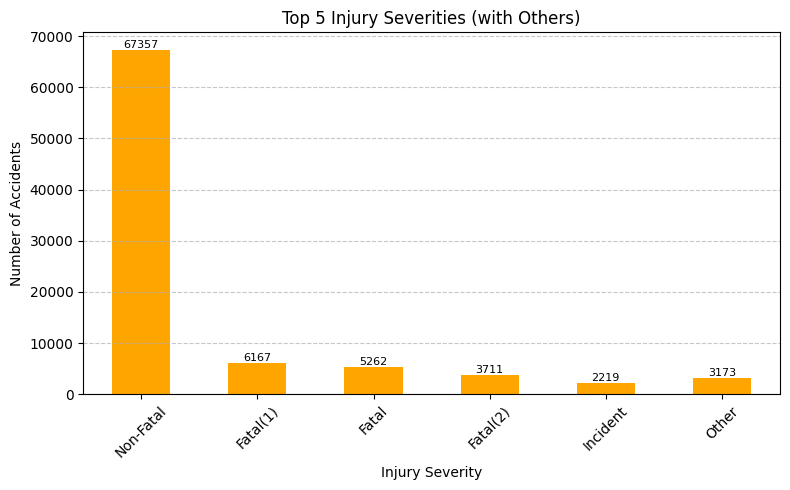

In [15]:
# 6. Injury severity distribution
plt.figure(figsize=(8, 5))
df['injury.severity'] = df['injury.severity'].str.strip().str.title()

    # Count frequencies
severity_counts = df['injury.severity'].value_counts()

    # Only keep top 5 categories for display
top_severities = severity_counts.head(5)

    # Group everything else as 'Other'
top_severities['Other'] = severity_counts.iloc[5:].sum()

    # Plot
plt.figure(figsize=(8, 5))
top_severities.plot(kind='bar', color='orange')
plt.title('Top 5 Injury Severities (with Others)')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels above each bar
for i, value in enumerate(top_severities.values):
    plt.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

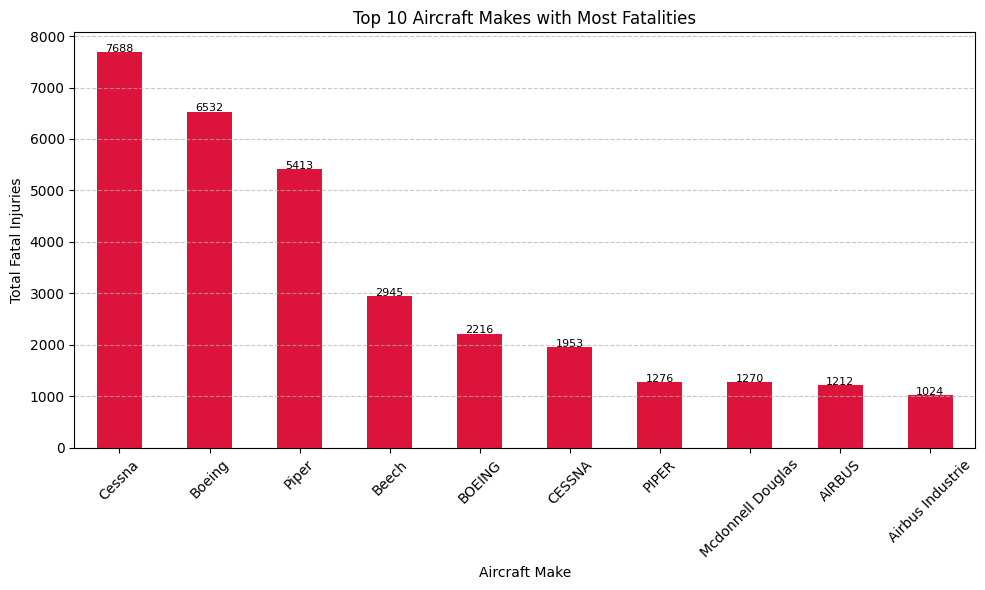

In [16]:
# 7. Aircraft makes with most fatalities

    # First, convert fatal injuries column to numeric
df['total.fatal.injuries'] = pd.to_numeric(df['total.fatal.injuries'], errors='coerce')

    # Then group by aircraft make and sum up total fatalities
fatal_by_make = df.groupby('make')['total.fatal.injuries'].sum().sort_values(ascending=False).head(10)

    # Plot with labels
plt.figure(figsize=(10, 6))
bars = fatal_by_make.plot(kind='bar', color='crimson')
plt.title('Top 10 Aircraft Makes with Most Fatalities')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

    # Add number labels on top
for index, value in enumerate(fatal_by_make):
    plt.text(index, value + 5, f'{int(value)}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


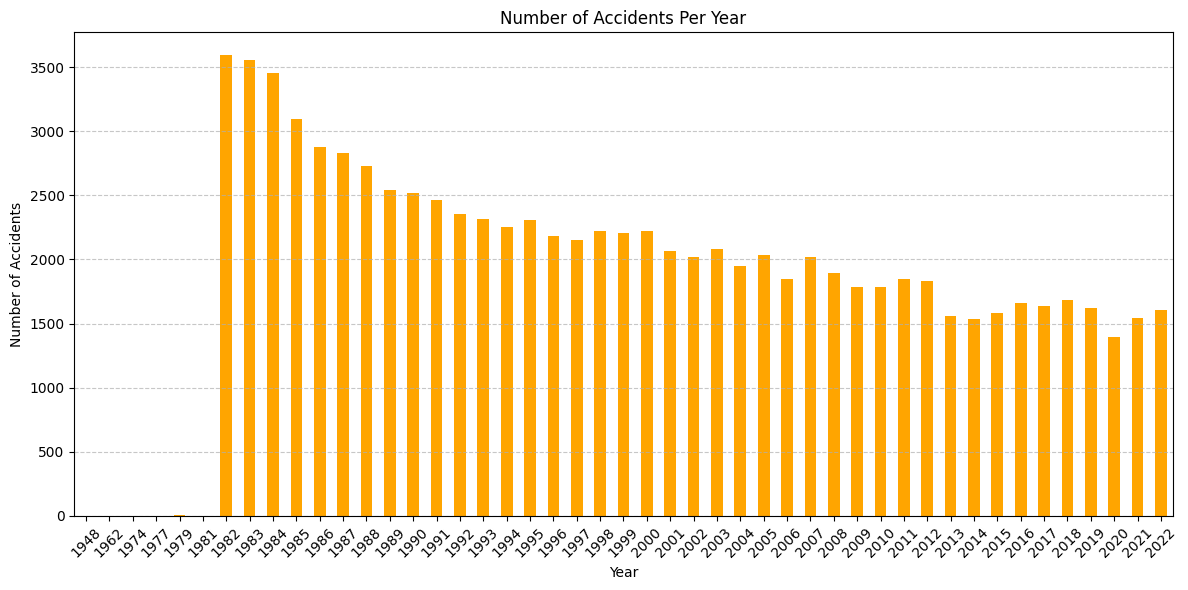

In [17]:
# 8. Accidents per year


# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df['event.date'] = pd.to_datetime(df['event.date'], errors='coerce')
df['year'] = df['event.date'].dt.year

# Plot accidents per year
plt.figure(figsize=(12, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Accidents Per Year')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

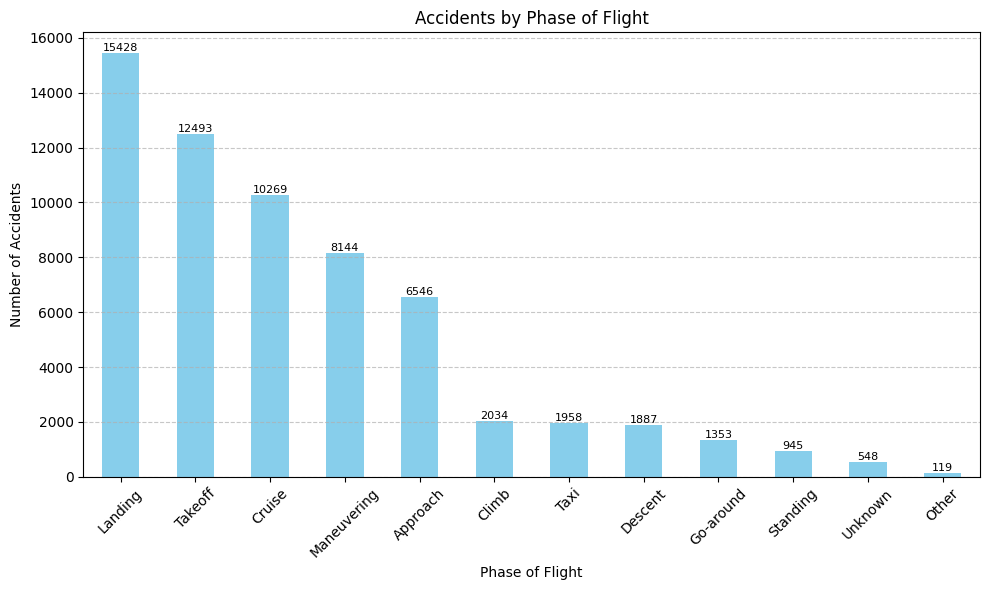

In [18]:
# 9. Accidents by phase of flight

# Get the counts first
phase_counts = df['broad.phase.of.flight'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = phase_counts.plot(kind='bar', color='skyblue')
plt.title('Accidents by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.xticks(rotation=45)
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels above bars
for i, value in enumerate(phase_counts.values):
    plt.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# 12. CONCLUSIONS & RECOMMENDATIONS
**Key Findings:**
- Some aircraft makes are linked to more fatal injuries
- Accidents were more common in certain years and flight phases
- Most injuries were classified as fatal or substantial

**Recommendations:**
1. Focus safety training on high-risk phases like approach and landing
2. Avoid aircraft makes with a history of high fatalities
3. Improve incident reporting to reduce missing values